## Website Phishing detection
#### Machine learning


<table style="border:hidden;">
    <tr>
        <td> 
            <table style="border:hidden;">
                <tr><td><img src="images/PhishingAccount.gif" width="400"> </td></tr>
                <tr><td><a href="https://storyset.com/web">Animated at Storyset</a> </td></tr>
            </table>
        </td>
        <td><b>What is happening? </b> 
            <p align="top"> 
            Phishing is a way to lure victims into malicious web pages where malware codes are hidden.<br> This way the attacker can intrude the enterprise network, evading firewalls.<br>    Phishing attack continues to pose a serious risk for web users and annoying threat within the field of electronic commerce.<br>
            Therefore, it is important to detect phishing URLs and prevent users from visiting them. </p>
        </td>
    </tr>
</table>

### What now? 
<b> Quick preview </b>

In this project, I am going to deal with a dataset that contains URL links (Phishing and Legitimate) <br>
From this data, I need to discover new features by extracting more information [Url based and HTML & JS based] <br>
After creating my new dataset I am going to experiment with different algorithms. <br>
Based on the dataset I am intending to create, my models will be generaly classification ones.<br>
In the end, I am going to observe and compare the results, see how important are the features I have created and conclude with choosing one of the best algorithms for my dataset. <br>

### Table of Contents
<ul>
    <li><a href="#import"> Importing required packages </a></li>
    <li><a href="#loadingData"> Loading data </a></li>
    <li>
        <a href="#featureEngineering"> Feature engineering </a>
        <ol>
            <li><a href="#URL_Length"> URL length </a></li>
            <li><a href="#URL_Depth"> URL depth </a></li>
            <li><a href="#Digitts_No"> Digits count </a></li>
            <li><a href="#Domain_Name"> Domain name </a></li>
            <li><a href="#Dots_No"> Domain Dots count </a></li>
            <li><a href="#Domain_length"> Domain length </a></li>
            <li><a href="#URL_Contains"> Presence of other Features </a></li>
            <li><a href="#HTML_JS"> HTML & JS </a></li>
        </ol>
    </li>
    <li><a href="#New_Dataset"> New dataset </a></li>
    <li><a href="#Models"> Algorithm models </a></li>
    <li><a href="#Observe"> Observation and comparision </a></li>
    <li><a href="#References"> References  </a></li>
</ul>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<a id='import'></a>"))
display(HTML("<style>.container { width:100% !important;}</style>"))
display(HTML("<h2> Importing required packages </h2>"))

In [2]:
# Importing required packages
import pandas as pd  # conda install pandas / pip install pandas
import matplotlib.pyplot as plt # conda install matplotlib / pip install matplotlib
import seaborn as sns # conda install seaborn / pip install seaborn


import numpy as np # conda install numpy / pip install numpy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error  # for model evaluation metrics

# for feature scaling
from sklearn.preprocessing import MinMaxScaler  # conda install scikit-learn / pip install scikit-learn

# to split the dataset into train and test
from sklearn.model_selection import train_test_split

# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# Random Forest model
from sklearn.ensemble import RandomForestClassifier

#XGBoost Classification model
from xgboost import XGBClassifier # (CPU only) conda install -c conda-forge py-KNNoost-cpu  (Use NVIDIA GPU) conda install -c conda-forge py-KNNoost-gpu / pip install KNNoost

# Random Forest model
from sklearn.neighbors import KNeighborsClassifier

# ANN model
from keras.layers import Input, Dense # conda install -c conda-forge keras / pip install keras
from keras import regularizers
from keras.models import Model

<a id='loadingData'></a>
### Loading data
Legitimate -> 0
Phishing -> 1 <br>
This dataset contains 20000 balanced URLs (10000 Fishing /10000 Legitimate)

In [37]:
# Loading the data
urlData = pd.read_csv("data/data_bal20000.csv")

# Please, If you want to load less data for testing purposes, uncomment the following line:
# urlData = urlData[0:499]

urlData.head(10)

,Labels,URLs
0,1,http://dbs.vote-friend.com/sg?ref=anything
1,0,https://www.reynoldstransfer.com/versa-lift-fo...
2,1,https://www.halisupportservice.com/Login.php
3,0,https://www.signets.com.br/wp-includes/wlwmani...
4,1,https://docs.google.com/document/d/e/2PACX-1vT...
5,0,https://www.iwestco.com/virtual-consult/
6,1,https://is.gd/N19JOz
7,1,https://httpsservices.runescape.com-ov.ru/
8,1,https://viandjo.com/website/membership/service...
9,0,https://www.millect.com/Plans/tabid/76/Default...


<a id='featureEngineering'></a>
### Feature engineering
By doing feature engineering I also make sure that data will be clean 🧹 and ready to use.


The values of the features are going to be: <br>
1 -> Legitimate <br>
0 -> Fishing <br>
-1 -> Suspicious <br>

In [4]:
# Importing the functions for the URL features
from URL_Features import getDomain, getURL_Length, getDomain_Length, getURL_Depth, getURL_IP, getURL_AtSymbol, getURLDomain_HTTP
from URL_Features import getURL_RedirectPosition, getURL_HyphenInDomain, getURL_Dot, getURL_HTTPs, getURL_ASCII, getURL_Digits
from HTMLJS_Features import HTMLJS_FeaturesThreading

<a id='URL_Length'></a>
##### URL length

Let's see how the length of the URL differs from PHISHING to LEGITIMATE URLs

c:\Users\Or3a\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


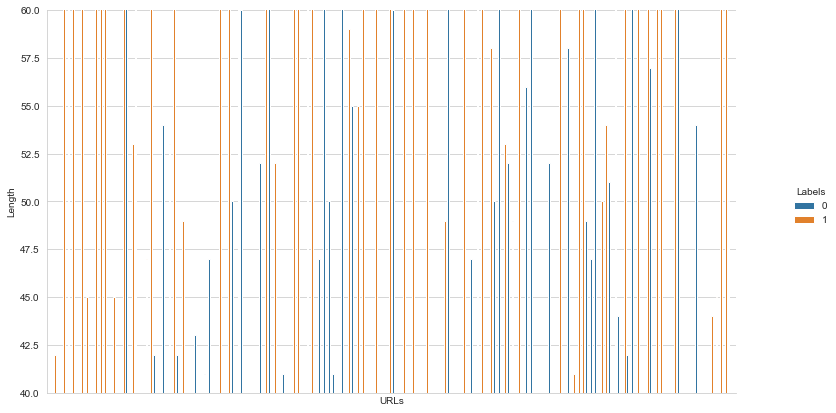

In [38]:

urlData['Length'] = urlData['URLs'].tail(150).str.len()

sns.set_style("whitegrid")
g = sns.catplot(data=urlData.tail(150), x="URLs", y="Length", hue="Labels", kind="bar")
g.set_axis_labels("URLs", "Length")

g.fig.set_figheight(6)
g.fig.set_figwidth(12)

g.set(xticks=[])
plt.ylim(40, 60)

del urlData["Length"]


I limited the graph. from 40 to 60, because that's where I noticed some difference.<br>
From what I see Legitimate URLs start to reduce noticeably after 48 and almost completely dissapear after 60.<br>
By this reasoning I decidet to put: <br>
Fishing for Length > 60 <br>
Legitimate for Length <= 48 <br>
Suspicious for the others in-between
<hr />

<a id='URL_Depth'></a>
##### URL depth

Depth is counted from the number of slashes in the URL '/'.
This is commonly used by phishers to trick users into thinking the URL is legitimate (mimicking)

c:\Users\Or3a\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


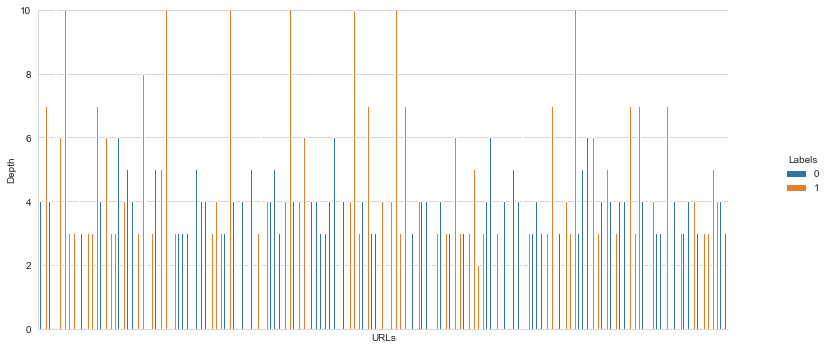

In [39]:

urlData['Depth'] = urlData['URLs'].tail(150).str.count('/')

sns.set_style("whitegrid")
g = sns.catplot(data=urlData.tail(150), x="URLs", y="Depth", hue="Labels", kind="bar")
g.set_axis_labels("URLs", "Depth")

g.fig.set_figheight(5)
g.fig.set_figwidth(12)

g.set(xticks=[])
plt.ylim(0, 10)

del urlData["Depth"]

Following the same steps as the length above, it is even more noticeable that Legitimate URLs are reduced afer 3 and almost not there after 4.<br>
So: <br>
Fishing for Depth > 4 <br>
Legitimate for Length <= 3 <br>
Suspicious for the others in-between
<hr />

<a id='Digits_No'></a>
##### Digits count in the URL
In the graph below, we will notice that Phishing URLs have a pretty high number of Digits

c:\Users\Or3a\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


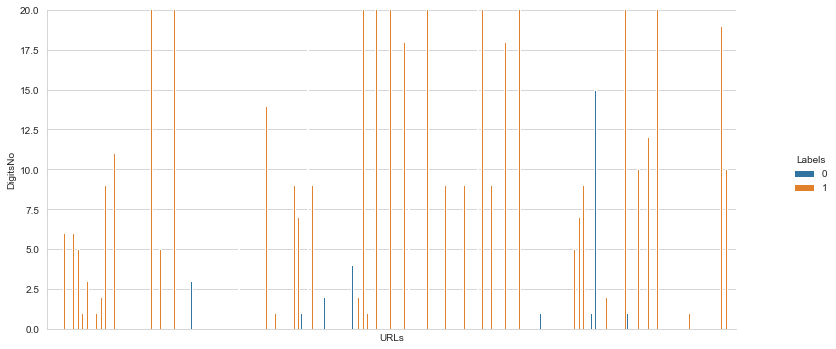

In [40]:

urlData['DigitsNo'] = urlData['URLs'].tail(150).str.count('\d')

sns.set_style("whitegrid")
g = sns.catplot(data=urlData.tail(150), x="URLs", y="DigitsNo", hue="Labels", kind="bar")
g.set_axis_labels("URLs", "DigitsNo")

g.fig.set_figheight(5)
g.fig.set_figwidth(12)

g.set(xticks=[])
plt.ylim(0, 20)

del urlData["DigitsNo"]

Fishing for Count > 4 <br>
Legitimate for Count x <= 2 <br>
Suspicious for the others in-between
<hr />

<a id='Redirect_Position'></a>
##### Redirect position

I have taken into account that a Legitimate URL should start with HTTPS:// <br>

The existence of “//” within the URL path means that the user will be redirected to another website. <br>
So, in this case the "//" position should be only after HTTPS. Every other location apart from after the protocol returns a Phishing value.
<hr />

<a id='Domain_Name'></a>
##### Domain name

We need to extract the name of the Domain to find out other related features <br>
The domain name is extracted with the help of Regex  <br>
- extract(r'^https?://(.*?)/', expand=False) <br>
- replace(r'www.', '', regex=True)
<hr />

In [8]:
getDomain(urlData)

0                          dbs.vote-friend.com
1                         reynoldstransfer.com
2                       halisupportservice.com
3                               signets.com.br
4                              docs.google.com
                         ...                  
19995           messagerievocale56.wixsite.com
19996         06e6f4d3bb4140516.temporary.link
19997    lbcpszonaseguravialbcp.cub-medisc.com
19998                           dljproduce.com
19999                    vineinternational.org
Name: URLs, Length: 20000, dtype: object

<a id='Dots_No'></a>
##### Dots count in the Domain name

c:\Users\Or3a\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


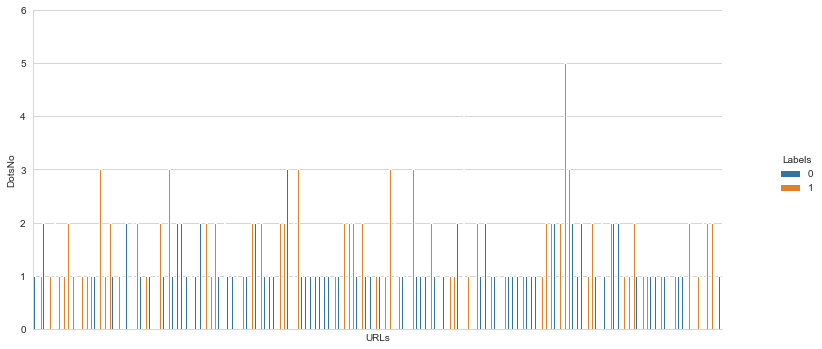

In [9]:
getDomain(urlData)
urlData['DotsNo'] = urlData['Domain'].tail(150).str.count('\.')

sns.set_style("whitegrid")
g = sns.catplot(data=urlData.tail(150), x="URLs", y="DotsNo", hue="Labels", kind="bar")
g.set_axis_labels("URLs", "DotsNo")

g.fig.set_figheight(5)
g.fig.set_figwidth(12)

g.set(xticks=[])
plt.ylim(0, 6)

del urlData["DotsNo"]

Fishing for Dots count x > 2 <br>
Legitimate for Dots count <= 1 <br>
Suspicious for the others in - between
<hr />

<a id='Domain_length'></a>
##### Domain length
For the same reason we calculated url length, but sometimes Domain length can be a better feature or at least an extra.

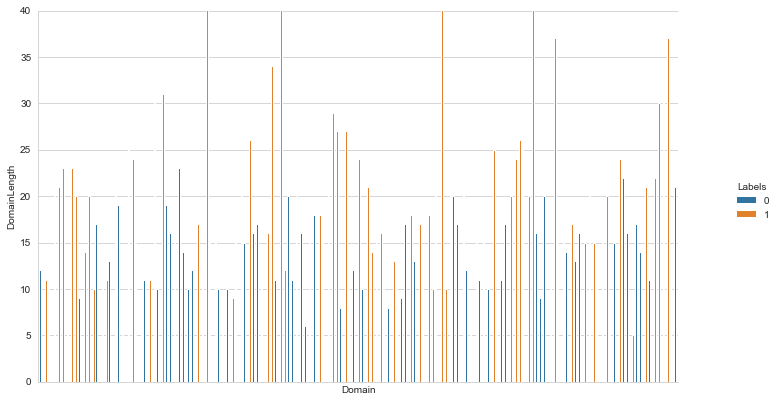

In [10]:

urlData['DomainLength'] = urlData['Domain'].tail(150).str.len()

sns.set_style("whitegrid")
g = sns.catplot(data=urlData.tail(150), x="Domain", y="DomainLength", hue="Labels", kind="bar")
g.set_axis_labels("Domain", "DomainLength")

g.fig.set_figheight(6)
g.fig.set_figwidth(12)

g.set(xticks=[])
plt.ylim(0, 40)

del urlData["DomainLength"]

From the graph we notice that not only Domains with greater length are Phishing URLs, but even those with smaller one.<br>

Fishing for Length > 18 or < 7 <br>
Legitimate for Length <= 12 <br>
Suspicious for the others in - between
<hr />

<a id='URL_Contains'></a>
##### Presence of other features in URLs

In most of the URLs there are characters, or numbers and strings that by their presence, define if it's a fishing URL or not. <br>
I have taken into consideration: <br>
<ul>
    <li> HTTP/HTTPS presence in Domain </li>
    <li> Hyphen presence in URL Domain </li>
    <li> URL @ symbol presence </li>
    <li> Non ASCII characters in URL </li>
    <li> IP address presence in URL </li>
    <li> Transport layer security (TLS) presence in URL </li>
</ul>
<hr />

<a id='HTML_JS'></a>
##### HTML and JS Features

I have used BeautifulSoup Library to scrape available (legal) data from the websites <br>
From there HTML and JS features can be extracted. The most common ones I saw are the ones I have listed below. <br>

<ul>
    <li> Disabled right click </li>
    <li> Number of web forwards </li>
    <li> Window popup existance </li>
    <li> Hidden Iframe redirection</li>
</ul>

Another special one is the Percentage of the same URLs(Domain) that are equal to the one we are currently on. <br>
To elaborate a little bit more on this.
It is common practise that the Fishers put 'links' within the pages (hidden or not) to make the user redirect from the mimicked website to the ones they want. <br>
This way we can see that if the % of these other links is low in comparison the one we are at it is possibly a Fishing website. <br>

Since the data extracted from these websites is large, the funksion took me a lot of time. <br>
So I have used threading to reduce it (~60min) <br>
Please, if attempted to try it uncomment the line: <br> # urlData = urlData.head(500) at <a href="#loadingData"> Loading data </a> <br>


<hr />

<a id='New_Dataset'></a>
##### Let's see and export the Dataset with the created features

In [11]:
# Feature engineering

# 1. Domain name
getDomain(urlData)

# 2. URL length
getURL_Length(urlData)

# 3. Domain length
getDomain_Length(urlData)

# 3. URL depth (number of slashes)
getURL_Depth(urlData)

# 4. URL @ symbol presence
getURL_AtSymbol(urlData)

# 5. IP address presence in URL
getURL_IP(urlData)

# 6. Transport layer security (TLS) presence in URL
getURL_HTTPs(urlData)

# 7. HTTP/HTTPS presence in URL Domain
getURLDomain_HTTP(urlData)

# 8. // Redirect postion in URL
getURL_RedirectPosition(urlData)

# 9. Prefix and suffix '-'
getURL_HyphenInDomain(urlData)

# 10. Number of '.' in URL Domain
getURL_Dot(urlData)

# 11. Unicode characters in URL
getURL_ASCII(urlData)

# 12. Number of digits in URL
getURL_Digits(urlData)

# HTML JS features
HTMLJS_FeaturesThreading(urlData)

urlData.head(10)


c:\Users\Or3a\anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:102: UserWarning: expected name token at '<![\x1bT´Çíè\x8al"ó8*\x98\x9b-\x96l'
  warnings.warn(msg)


,Labels,URLs,Domain,URL_Length,Domain_Length,URL_depth,URL_atSymbol,URL_IP,URL_HTTPS,Domain_HTTP,URL_RedirectPosition,URL_HyphenInDomain,URL_DotsNo,URL_NonASCHIIChar,URL_DigitsNo,HTMLJS_Features
0,1,http://dbs.vote-friend.com/sg?ref=anything,dbs.vote-friend.com,0,1,0,0,0,1,0,1,1,-1,0,0,0
1,0,https://www.reynoldstransfer.com/versa-lift-fo...,reynoldstransfer.com,-1,1,-1,0,0,0,0,0,0,0,0,0,1
2,1,https://www.halisupportservice.com/Login.php,halisupportservice.com,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,https://www.signets.com.br/wp-includes/wlwmani...,signets.com.br,-1,-1,-1,0,0,0,0,0,0,-1,0,0,0
4,1,https://docs.google.com/document/d/e/2PACX-1vT...,docs.google.com,1,-1,1,0,0,0,0,0,0,-1,0,1,0
5,0,https://www.iwestco.com/virtual-consult/,iwestco.com,0,0,-1,0,0,0,0,0,0,0,0,0,0
6,1,https://is.gd/N19JOz,is.gd,0,1,0,0,0,0,0,0,0,0,0,0,0
7,1,https://httpsservices.runescape.com-ov.ru/,httpsservices.runescape.com-ov.ru,0,1,0,0,0,0,1,0,1,1,0,0,0
8,1,https://viandjo.com/website/membership/service...,viandjo.com,1,0,1,0,0,0,0,0,0,0,0,1,0
9,0,https://www.millect.com/Plans/tabid/76/Default...,millect.com,-1,0,1,0,0,0,0,0,0,0,0,0,0


In [12]:
# urlData.to_csv(r'data/20000URL_Features.csv', index = False)

##### Loading the new Dataset

In [44]:
# Loading newly generated dataset
newUrlData = pd.read_csv("data/20000URL_Features.csv")

<a id='New_Dataset'></a>
After testing the Models we want to compare them with each - other.
So I am creating holders to store the models performance results.

In [14]:
ML_Model = []
acc_train = []
acc_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g, h):
    ML_Model.append(model)
    acc_train.append(round(a, 3)),
    acc_test.append(round(b, 3)),
    precision_train.append(round(c, 3)),
    precision_test.append(round(d, 3)),
    recall_train.append(round(e, 3)),
    recall_test.append(round(f, 3)),
    f1_train.append(round(g, 3)),
    f1_test.append(round(h, 3))

#####  1. Decision Tree model

In [15]:
# Sepratating & assigning features and target columns to X & y
y = newUrlData['Labels']
X = newUrlData.drop('Labels', axis=1)
X = X.drop('URLs', axis=1).drop('Domain', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((16000, 13), (4000, 13))

In [16]:
# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

precision_train_tree = precision_score(y_train,y_train_tree)
precision_test_tree = precision_score(y_test,y_test_tree)

recall_train_tree = recall_score(y_train,y_train_tree)
recall_test_tree = recall_score(y_test,y_test_tree)

f1_train_tree = f1_score(y_train,y_train_tree)
f1_test_tree = f1_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

print("Decision Tree: Precision on training Data: {:.3f}".format(precision_train_tree))
print("Decision Tree: Precision on test Data: {:.3f}".format(precision_test_tree))

print("Decision Tree: Recall on training Data: {:.3f}".format(recall_train_tree))
print("Decision Tree: Recall on test Data: {:.3f}".format(recall_test_tree))

print("Decision Tree: F1 on training Data: {:.3f}".format(f1_train_tree))
print("Decision Tree: F1 on test Data: {:.3f}".format(f1_test_tree))

Decision Tree: Accuracy on training Data: 0.842
Decision Tree: Accuracy on test Data: 0.832
Decision Tree: Precision on training Data: 0.834
Decision Tree: Precision on test Data: 0.823
Decision Tree: Recall on training Data: 0.855
Decision Tree: Recall on test Data: 0.839
Decision Tree: F1 on training Data: 0.844
Decision Tree: F1 on test Data: 0.831


Let's see the feature importance for Decision Tree

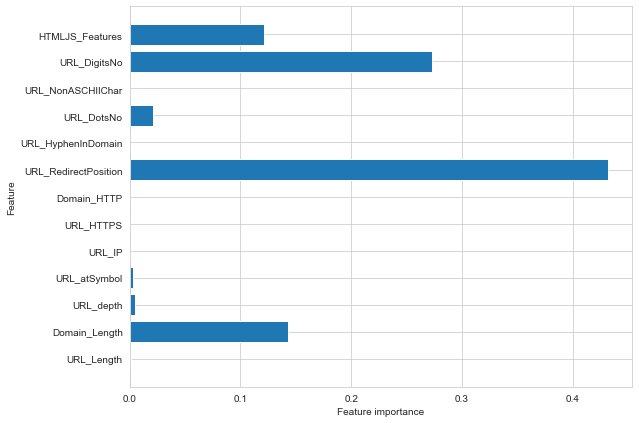

In [17]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [18]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Decision Tree', acc_train_tree, acc_test_tree, precision_train_tree, precision_test_tree, recall_train_tree, recall_test_tree, f1_train_tree, f1_test_tree)

#####  2. Random Forest Classifier

In [19]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
# Sepratating & assigning features and target columns to X & y
y = newUrlData['Labels']
X = newUrlData.drop('Labels', axis=1)
X = X.drop('URLs', axis=1).drop('Domain', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape
# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

precision_train_forest = precision_score(y_train,y_train_forest)
precision_test_forest = precision_score(y_test,y_test_forest)
recall_train_forest = recall_score(y_train,y_train_forest)
recall_test_forest = recall_score(y_test,y_test_forest)

f1_train_forest = f1_score(y_train,y_train_forest)
f1_test_forest = f1_score(y_test,y_test_forest)


print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

print("Random forest: Precision on training Data: {:.3f}".format(precision_train_forest))
print("Random forest: Precision on test Data: {:.3f}".format(precision_test_forest))

print("Random forest: Recall on training Data: {:.3f}".format(recall_train_forest))
print("Random forest: Recall on test Data: {:.3f}".format(recall_test_forest))

print("Random forest: F1 on training Data: {:.3f}".format(f1_train_forest))
print("Random forest: F1 on test Data: {:.3f}".format(f1_test_forest))


Random forest: Accuracy on training Data: 0.854
Random forest: Accuracy on test Data: 0.851
Random forest: Precision on training Data: 0.895
Random forest: Precision on test Data: 0.895
Random forest: Recall on training Data: 0.803
Random forest: Recall on test Data: 0.789
Random forest: F1 on training Data: 0.847
Random forest: F1 on test Data: 0.839


Let's see again the feature importance for this Model

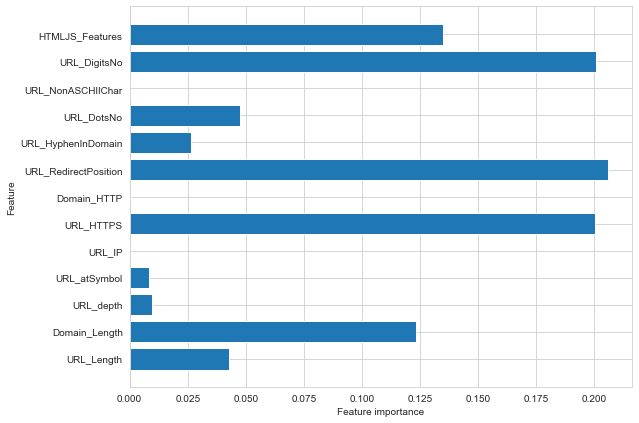

In [20]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [21]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Random Forest', acc_train_forest, acc_test_forest, precision_train_forest, precision_test_forest, recall_train_forest, recall_test_forest, f1_train_forest, f1_test_forest)

#####  3. XGBoost Classifier

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from numpy import sort

# Sepratating & assigning features and target columns to X & y
y = newUrlData['Labels']
X = newUrlData.drop('Labels', axis=1)
X = X.drop('URLs', axis=1).drop('Domain', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape
# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)



In [46]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

precision_train_xgb = precision_score(y_train,y_train_xgb)
precision_test_xgb = precision_score(y_test,y_test_xgb)

recall_train_xgb = recall_score(y_train,y_train_xgb)
recall_test_xgb = recall_score(y_test,y_test_xgb)

f1_train_xgb = f1_score(y_train,y_train_xgb)
f1_test_xgb = f1_score(y_test,y_test_xgb)


print("XGB: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGB: Accuracy on test Data: {:.3f}".format(acc_test_xgb))

print("XGB: Precision on training Data: {:.3f}".format(precision_train_xgb))
print("XGB: Precision on test Data: {:.3f}".format(precision_test_xgb))

print("XGB: Recall on training Data: {:.3f}".format(recall_train_xgb))
print("XGB: Recall on test Data: {:.3f}".format(recall_test_xgb))

print("XGB: F1 on training Data: {:.3f}".format(f1_train_xgb))
print("XGB: F1 on test Data: {:.3f}".format(f1_test_xgb))

XGB: Accuracy on training Data: 0.870
XGB: Accuracy on test Data: 0.851
XGB: Precision on training Data: 0.908
XGB: Precision on test Data: 0.889
XGB: Recall on training Data: 0.825
XGB: Recall on test Data: 0.797
XGB: F1 on training Data: 0.865
XGB: F1 on test Data: 0.840


Ploting the feature importance

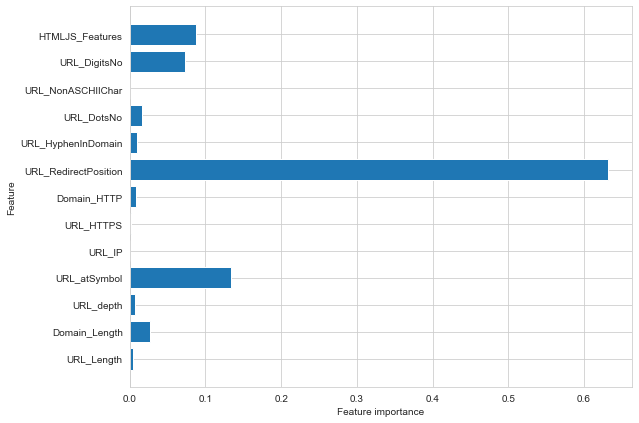

In [24]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Lets check how to use feature importance for feature selection

In [52]:
# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier(use_label_encoder=False,
                                 	eval_metric='mlogloss')
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=13, Accuracy: 84.92%
Thresh=0.000, n=13, Accuracy: 84.92%
Thresh=0.002, n=11, Accuracy: 84.92%
Thresh=0.005, n=10, Accuracy: 85.02%
Thresh=0.007, n=9, Accuracy: 84.90%
Thresh=0.009, n=8, Accuracy: 85.55%
Thresh=0.009, n=7, Accuracy: 85.55%
Thresh=0.016, n=6, Accuracy: 84.38%
Thresh=0.026, n=5, Accuracy: 83.43%
Thresh=0.072, n=4, Accuracy: 80.95%
Thresh=0.087, n=3, Accuracy: 70.93%
Thresh=0.134, n=2, Accuracy: 70.93%
Thresh=0.632, n=1, Accuracy: 69.90%


In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb, precision_train_xgb, precision_test_xgb, recall_train_xgb, recall_test_xgb, f1_train_xgb, f1_test_xgb)

#####  4. KNN Classifier

In [35]:
# Sepratating & assigning features and target columns to X & y
y = newUrlData['Labels']
X = newUrlData.drop('Labels', axis=1)
X = X.drop('URLs', axis=1).drop('Domain', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

# fit the model 
KNN_model.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_KNN = KNN_model.predict(X_test)
y_train_KNN = KNN_model.predict(X_train)

#computing the accuracy of the model performance
acc_train_KNN= accuracy_score(y_train,y_train_KNN)
acc_test_KNN = accuracy_score(y_test,y_test_KNN)

precision_train_KNN = precision_score(y_train,y_train_KNN)
precision_test_KNN= precision_score(y_test,y_test_KNN)

recall_train_KNN = recall_score(y_train,y_train_KNN)
recall_test_KNN= recall_score(y_test,y_test_KNN)

f1_train_KNN = f1_score(y_train,y_train_KNN)
f1_test_KNN = f1_score(y_test,y_test_KNN)


print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_KNN))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_KNN))

print("KNN: Precision on training Data: {:.3f}".format(precision_train_KNN))
print("KNN: Precision on test Data: {:.3f}".format(precision_test_KNN))

print("KNN: Recall on training Data: {:.3f}".format(recall_train_KNN))
print("KNN: Recall on test Data: {:.3f}".format(recall_test_KNN))

print("KNN: F1 on training Data: {:.3f}".format(f1_train_KNN))
print("KNN: F1 on test Data: {:.3f}".format(f1_test_KNN))



KNN: Accuracy on training Data: 0.852
KNN: Accuracy on test Data: 0.843
KNN: Precision on training Data: 0.856
KNN: Precision on test Data: 0.849
KNN: Recall on training Data: 0.848
KNN: Recall on test Data: 0.829
KNN: F1 on training Data: 0.852
KNN: F1 on test Data: 0.839


In [27]:
storeResults('KNN', acc_train_KNN, acc_test_KNN, precision_train_KNN, precision_test_KNN, recall_train_KNN, recall_test_KNN, f1_train_KNN, f1_test_KNN)

#####  5. ANN MODEL

In [28]:
# Sepratating & assigning features and target columns to X & y
y = newUrlData['Labels']
X = newUrlData.drop('Labels', axis=1)
X = X.drop('URLs', axis=1).drop('Domain', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)

In [29]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 11)                154       
                                                                 
 dense_5 (Dense)             (None, 13)                156       
                                                                 
 dense_6 (Dense)             (None, 13)                182       
                                                                 
Total params: 856
Trainable params: 856
Non-trainable params:

In [30]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 0.2360 - accuracy: 0.0955 - val_loss: -0.1054 - val_accuracy: 0.0763
Epoch 2/10
200/200 [==============================] - 0s 983us/step - loss: -0.2023 - accuracy: 0.1519 - val_loss: -0.4728 - val_accuracy: 0.0938
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: -0.4754 - accuracy: 0.1343 - val_loss: -0.5318 - val_accuracy: 0.1769
Epoch 4/10
200/200 [==============================] - 0s 981us/step - loss: -0.5576 - accuracy: 0.2008 - val_loss: -0.6155 - val_accuracy: 0.2156
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: -0.6638 - accuracy: 0.2890 - val_loss: -0.7114 - val_accuracy: 0.3341
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: -0.6613 - accuracy: 0.3239 - val_loss: -0.6894 - val_accuracy: 0.2887
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: -0.7295 - accuracy: 0.3846 - val_loss: -0.7710 - val_accura

In [31]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

125/125 [==============================] - 0s 725us/step - loss: -0.8968 - accuracy: 0.4748

Autoencoder: Accuracy on training Data: 0.478
Autoencoder: Accuracy on test Data: 0.475


We can say without even going further that it's not the proper Model approach for this kind of dataset
<hr />

If you notice I showed feature_importances after training the model to see how it affected them differently.<br>

<a id='Observe'></a>
##### Let's observe, shall we?

In [32]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train Precision': precision_train,
    'Test Precision': precision_test,
    'Train Recall': recall_train,
    'Test Recall': recall_test,
    'Train F1': f1_train,
    'Test F1': f1_test,
    })
results

,ML Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Decision Tree,0.842,0.832,0.834,0.823,0.855,0.839,0.844,0.831
1,Random Forest,0.854,0.850,0.895,0.895,0.803,0.789,0.847,0.839
2,XGBoost,0.870,0.851,0.908,0.889,0.825,0.797,0.865,0.840
3,KNN,0.852,0.843,0.856,0.849,0.848,0.829,0.852,0.839


On personal preference, Accuracy and Precision are the most Important for this datase. <br>
In this case XGBoost is the preferred model.<br>

Let's save it to continue the project in another time 

In [33]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

<a id='References'></a>
##### References
 - Intelligent phishing url detection using association rule mining
 - https://blog.keras.io/building-autoencoders-in-keras.html
 - https://www.kaggle.com/code/fadilparves/pishing-detection-using-machine-learning